# Chapter 8 - Poisson Processes
http://allendowney.github.io/ThinkBayes2/chap08.html

## Reading

### The Poisson Distribution

In [1]:
from scipy.stats import poisson

lam = 1.4
dist = poisson(lam)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [2]:
k = 4
dist.pmf(k)

0.039471954028253146

In [3]:
from empiricaldist import Pmf

def make_poisson_pmf(lam, qs):
    """Make a Pmf of a Poisson distribution"""
    ps = poisson(lam).pmf(qs)
    pmf = Pmf(ps, qs)
    pmf.normalize()
    return pmf

In [4]:
import numpy as np

lam = 1.4
goals = np.arange(10)
pmf_goals = make_poisson_pmf(lam, goals)

In [5]:
from utils import decorate

def decorate_goals(title=''):
    decorate(xlabel='Number of goals',
        ylabel='PMF',
        title=title)

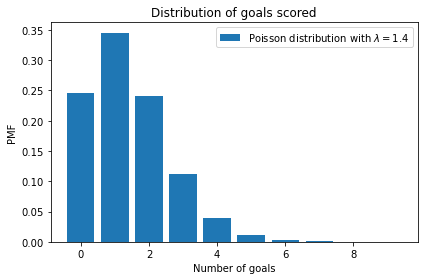

In [6]:
pmf_goals.bar(label=r'Poisson distribution with $\lambda=1.4$')

decorate_goals('Distribution of goals scored')

### The Gamma Distribution

In [7]:
from scipy.stats import gamma

alpha = 1.4
qs = np.linspace(0, 10, 101)
ps = gamma(alpha).pdf(qs)

In [8]:
from empiricaldist import Pmf

prior = Pmf(ps, qs)
prior.normalize()

9.889360237140306

In [9]:
def decorate_rate(title=''):
    decorate(xlabel='Goal scoring rate (lam)',
        ylabel='PMF',
        title=title)

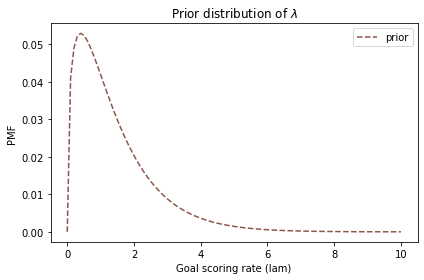

In [10]:
prior.plot(ls='--', label='prior', color='C5')
decorate_rate(r'Prior distribution of $\lambda$')

In [11]:
prior.mean()

1.4140818156118378

In [12]:
lams = prior.qs
k = 4
likelihood = poisson(lam).pmf(k)

In [13]:
def update_poisson(pmf, data):
    """Update Pmf with a Poisson likelihood"""
    k = data
    lams = pmf.qs
    likelihood = poisson(lams).pmf(k)
    pmf *= likelihood
    pmf.normalize()

In [14]:
france = prior.copy()
update_poisson(france, 4)

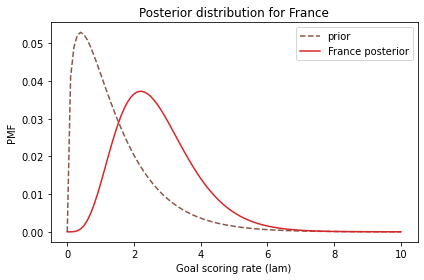

In [15]:
prior.plot(ls='--', label='prior', color='C5')
france.plot(label='France posterior', color='C3')

decorate_rate('Posterior distribution for France')

In [16]:
croatia = prior.copy()
update_poisson(croatia, 2)

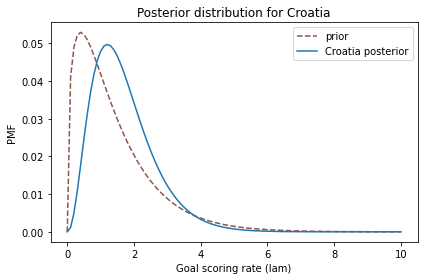

In [17]:
prior.plot(ls='--', label='prior', color='C5')
croatia.plot(label='Croatia posterior', color='C0')

decorate_rate('Posterior distribution for Croatia')

In [18]:
print(croatia.mean(), france.mean())

1.6999765866755225 2.699772393342308


### Probability of superiority

In [21]:
def prob_gt(pmf1, pmf2):
    """Compute the probability of superiority"""
    total = 0
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            if q1 > q2:
                total += p1 * p2
    return total

In [22]:
prob_gt(france, croatia)

0.7499366290930155

In [23]:
Pmf.prob_gt(france, croatia)

0.7499366290930174

### Predicting the rematch

In [24]:
pmf_seq = [make_poisson_pmf(lam, goals) for lam in prior.qs]

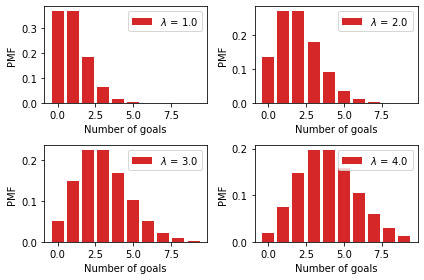

In [25]:
import matplotlib.pyplot as plt

for i, index in enumerate([10, 20, 30, 40]):
    plt.subplot(2, 2, i+1)
    lam = prior.qs[index]
    pmf = pmf_seq[index]
    pmf.bar(label=f'$\lambda$ = {lam}', color='C3')
    decorate_goals()

In [26]:
from utils import make_mixture

pred_france = make_mixture(france, pmf_seq)

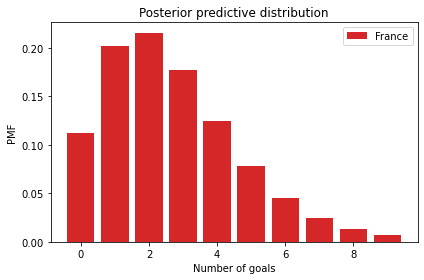

In [27]:
pred_france.bar(color='C3', label='France')
decorate_goals('Posterior predictive distribution')

In [30]:
pred_croatia = make_mixture(croatia, pmf_seq)

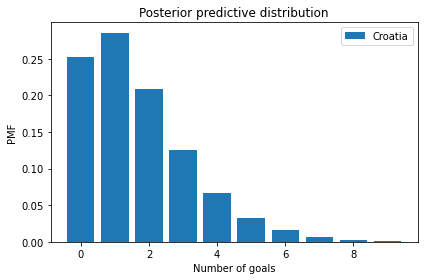

In [31]:
pred_croatia.bar(color='C0', label='Croatia')
decorate_goals('Posterior predictive distribution')

In [32]:
win = Pmf.prob_gt(pred_france, pred_croatia)
win

0.5703522415934519

In [33]:
lose = Pmf.prob_lt(pred_france, pred_croatia)
lose

0.26443376257235873

In [34]:
tie = Pmf.prob_eq(pred_france, pred_croatia)
tie

0.16521399583418947

In [35]:
win + tie/2

0.6529592395105466

### The Exponential Distribution

In [36]:
def expo_pdf(t, lam):
    """Compute the PDF of the exponential distribution."""
    return lam * np.exp(-lam * t)

In [37]:
lam = 1.4
qs = np.linspace(0, 4, 101)
ps = expo_pdf(qs, lam)
pmf_time = Pmf(ps, qs)
pmf_time.normalize()

25.616650745459093

In [38]:
def decorate_time(title=''):
    decorate(xlabel='Time between goals (games)',
             ylabel='PMF',
             title=title)

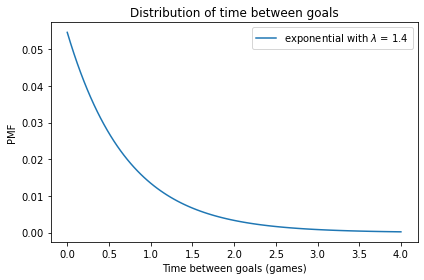

In [39]:
pmf_time.plot(label='exponential with $\lambda$ = 1.4')

decorate_time('Distribution of time between goals')

## Exercises

**Exercise:** Let's finish the exercise we started:

>In the 2014 FIFA World Cup, Germany played Brazil in a semifinal match. Germany scored after 11 minutes and again at the 23 minute mark. At that point in the match, how many goals would you expect Germany to score after 90 minutes? What was the probability that they would score 5 more goals (as, in fact, they did)?

Here are the steps I recommend:

1. Starting with the same gamma prior we used in the previous problem, compute the likelihood of scoring a goal after 11 minutes for each possible value of `lam`.  Don't forget to convert all times into games rather than minutes.

2. Compute the posterior distribution of `lam` for Germany after the first goal.

3. Compute the likelihood of scoring another goal after 12 more minutes and do another update.  Plot the prior, posterior after one goal, and posterior after two goals.

4. Compute the posterior predictive distribution of goals Germany might score during the remaining time in the game, `90-23` minutes.  Note: You will have to think about how to generate predicted goals for a fraction of a game.

5. Compute the probability of scoring 5 or more goals during the remaining time.

In [40]:
alpha = 1.4
qs = np.linspace(0, 10, 101)
ps = gamma(alpha).pdf(qs)

prior = Pmf(ps, qs)
prior.normalize()

9.889360237140306

In [142]:
lams = prior.qs
likelihood_11 = expo_pdf(11 / 90, lams)

posterior1 = prior * likelihood_11
posterior1.normalize()

1.0728988807549489

In [143]:
likelihood_12 = expo_pdf(12 / 90, lams)
posterior2 = posterior1 * likelihood_12
posterior2.normalize()

1.4598709349606904

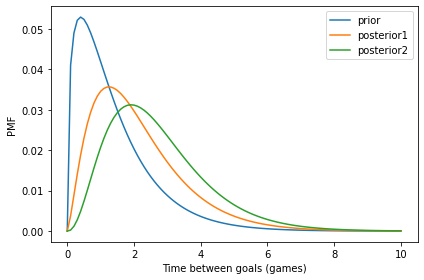

In [144]:
prior.plot(label='prior')
posterior1.plot(label='posterior1')
posterior2.plot(label='posterior2')
decorate_time()

In [145]:
posterior1.mean(), posterior2.mean()

(2.1358882653086892, 2.703059034926364)

In [146]:
posterior2

,probs
0.0,0.000000
0.1,0.000255
0.2,0.001189
0.3,0.002776
0.4,0.004884
...,...
9.6,0.000097
9.7,0.000087
9.8,0.000079
9.9,0.000071


In [148]:
# I think the rate of goals in a fraction of a game should be proportional to the fraction

goals = np.arange(10)

pmf_seq = [make_poisson_pmf((90 - 23) / 90 * lam, goals) for lam in posterior2.qs]

pred = make_mixture(posterior2, pmf_seq)

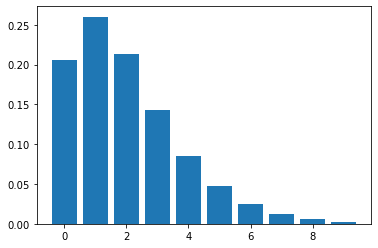

In [150]:
pred.bar()

In [151]:
pred.prob_ge(5)

0.09286200122834538

**Exercise:** Returning to the first version of the World Cup Problem.  Suppose France and Croatia play a rematch.  What is the probability that France scores first?

Hint: Compute the posterior predictive distribution for the time until the first goal by making a mixture of exponential distributions.  You can use the following function to make a PMF that approximates an exponential distribution.

In [154]:
def make_expo_pmf(lam, high):
    """Make a PMF of an exponential distribution.
    
    lam: event rate
    high: upper bound on the interval `t`
    
    returns: Pmf of the interval between events
    """
    qs = np.linspace(0, high, 101)
    ps = expo_pdf(qs, lam)
    pmf = Pmf(ps, qs)
    pmf.normalize()
    return pmf

In [152]:
alpha = 1.4
qs = np.linspace(0, 10, 101)
ps = gamma(alpha).pdf(qs)

prior = Pmf(ps, qs)
prior.normalize()

france = prior.copy()
update_poisson(france, 4)

In [153]:
croatia = prior.copy()
update_poisson(croatia, 2)

In [155]:
# Prior distribution of time until first goal
high = 4
pmf_seq = [make_expo_pmf(lam, high) for lam in prior.qs]

In [158]:
pred_france = make_mixture(france, pmf_seq)
pred_croatia = make_mixture(croatia, pmf_seq)

<AxesSubplot:>

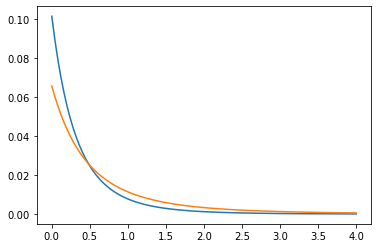

In [157]:
pred_france.plot()
pred_croatia.plot()

In [160]:
Pmf.prob_lt(pred_france, pred_croatia)

0.5904596116867543

**Exercise:** In the 2010-11 National Hockey League (NHL) Finals, my beloved Boston
Bruins played a best-of-seven championship series against the despised
Vancouver Canucks.  Boston lost the first two games 0-1 and 2-3, then
won the next two games 8-1 and 4-0.  At this point in the series, what
is the probability that Boston will win the next game, and what is
their probability of winning the championship?

To choose a prior distribution, I got some statistics from
http://www.nhl.com, specifically the average goals per game
for each team in the 2010-11 season.  The distribution is well modeled by a gamma distribution with mean 2.8.

In what ways do you think the outcome of these games might violate the assumptions of the Poisson model?  How would these violations affect your predictions?

In [161]:
alpha = 2.8
qs = np.linspace(0, 20, 101)
ps = gamma(alpha).pdf(qs)

prior = Pmf(ps, qs)
prior.normalize()

4.999692501353028

In [162]:
boston_data = [0, 2, 8, 4]
vancouver_data = [1, 3, 1, 0]

In [191]:
boston = prior.copy()
for data in boston_data:
    update_poisson(boston, data)
    
vancouver = prior.copy()
for data in vancouver_data:
    update_poisson(vancouver, data)

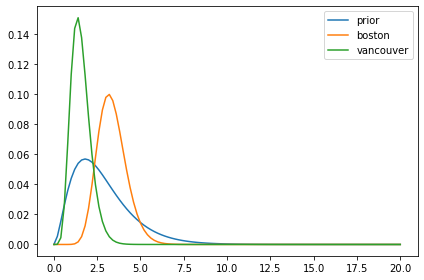

In [183]:
prior.plot(label='prior')
boston.plot(label='boston')
vancouver.plot(label='vancouver')
decorate()

In [198]:
prob_win = Pmf.prob_gt(pred_boston, pred_vancouver)
prob_win

0.7038674922156204

In [199]:
prob_tie = Pmf.prob_eq(pred_boston, pred_vancouver)
prob_tie

0.1350176736159354

There is a 70% chance Boston will win the next game and a 13.5 % chance of a tie.

Assume there is a 50% chance of winning a tie.

In [200]:
prob_win += prob_tie / 2
prob_win

0.7713763290235881

In [202]:
# Solution

# Their chance of winning the series is their
# chance of winning k=2 or k=3 of the remaining
# n=3 games.

from scipy.stats import binom

n = 3
a = binom.pmf([2,3], n, prob_win)
a.sum()

0.8670934132699937

In [203]:
a

array([0.40810796, 0.45898545])